<a href="https://colab.research.google.com/github/mayankraj25/Student-Performance-/blob/main/Training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
from google.colab import files
uploaded = files.upload()

Saving student_performance_data.csv to student_performance_data.csv


In [21]:
df=pd.read_csv('student_performance_data.csv')
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [23]:
print(df.shape)
df.isnull().sum()

(500, 9)


,0
StudentID,0
Gender,0
Age,0
StudyHoursPerWeek,0
AttendanceRate,0
GPA,0
Major,0
PartTimeJob,0
ExtraCurricularActivities,0


In [40]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'PartTimeJob', 'ExtraCurricularActivities', 'Major'], drop_first=True)
X = df_encoded.drop(['StudentID', 'GPA'],axis=1)
y = df['GPA']
scale=StandardScaler()
X=scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
accuracy=r2_score(y_test,predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.013596308764176945


<Axes: >

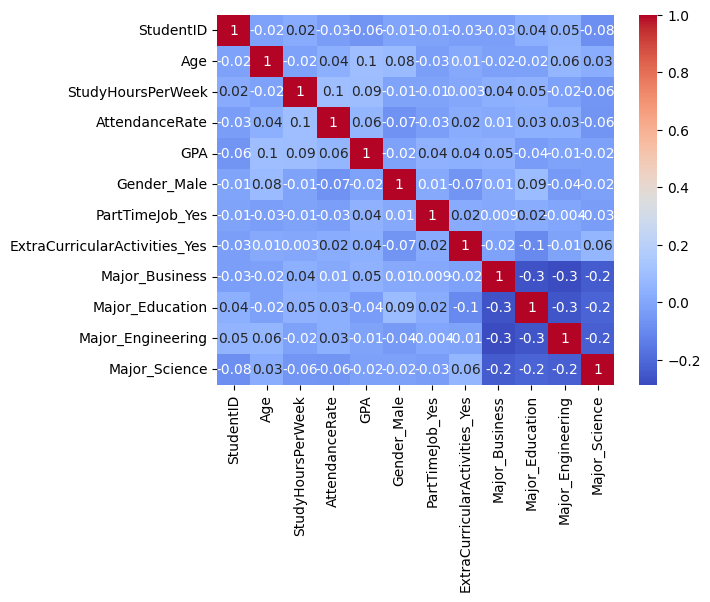

In [46]:
df_encoded.corr()
import seaborn as sns
sns.heatmap(df_encoded.corr(),annot=True,square=False,cmap='coolwarm',fmt='.1g,')
#This shows that there is not a good correlation of the data with each other heance obtaining a linear realtionship is hard

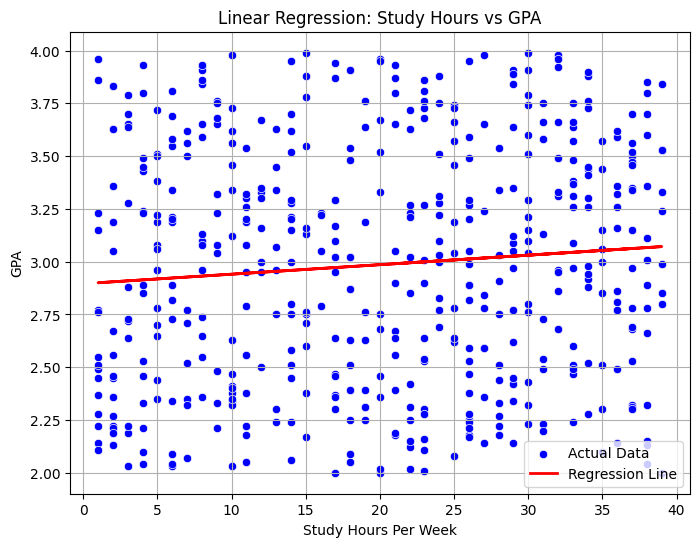

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Example: Using one feature for plotting
X = df[['StudyHoursPerWeek']]
y = df['GPA']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['StudyHoursPerWeek'], y=df['GPA'], label='Actual Data', color='blue')
plt.plot(df['StudyHoursPerWeek'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Study Hours Per Week")
plt.ylabel("GPA")
plt.title("Linear Regression: Study Hours vs GPA")
plt.legend()
plt.grid(True)
plt.show()